
# Project 2: Investigate The "No show appointments" dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I will analyze the " No show appointments" in Brazil, This is data set collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment. This is data set include the data about:'
PatientId:	    Identification of a patient
AppointmentID:	Identification of each appointment
Gender:      	Male or Female.
ScheduledDay:	The day someone called or registered the appointment.
AppointmentDay:	The day of the actuall appointment, when they have to visit the doctor.
Age:           	How old is the patient.
Neighbourhood:	Where the appointment takes place.
Scholarship: 	True of False
Hipertension:	True or False
Diabetes:   	True or False
Alcoholism: 	True or False
Handcap:    	True or False
SMS_received:	messages sent to the patient.
No-show:     	True or False



First I will expands the pandas, Numpay and matplotlib to make the analyzing process easy 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>I will view and check out some statisticalon the data.

In [12]:
# Load the data and view it
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Check out the frame of data set
df.shape

(110527, 14)

In [14]:
#check out if the data has a null value or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
#show some stat numbers about the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


General notes about the dataset
1. The data has 110,527 recoreds with 14 criterions.
2. No null values in dataset
3. Some columns have incorrect data types such as (PatientID,ScheduledDay and AppointmentDay)
4. The column "Hipertension" has a Misspelled
5. When we are looking on the describe table, we note that the min of age is -1 which is missleading.Also, in Handcap column the maxiumum is 4 "but we were doing some research on handcap in kaggle, we knew that the number is refer to how is the patient has a kinds of disabilites.[5]
6. Be aware about the no-show column, Showing on appointments = yes, otherwise = no


### Data Cleaning 
We do some cleaning on data that we are using in analyaing processs.

In [16]:
# Remove the unnecessary columns
df.drop(['PatientId','ScheduledDay','AppointmentDay','AppointmentID' ], axis=1, inplace=True)

In [17]:
# Check out the table
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
# Rename the Hipertension column to correct seplling "Hypertension"
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
# checking out 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# Rename the "No-show" column in to 'No_show'
df.rename(columns={'No-show':'No_show'}, inplace=True)
# checking out 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
# Remove the row that has an age column with value -1 
df.drop(df.query('Age == -1').index,inplace=True)
#https://stackoverflow.com/questions/47562604/deleting-row-in-pandas-dataframe-without-effecting-index
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#check the shape of data set after making the previos cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null int64
Hypertension     110526 non-null int64
Diabetes         110526 non-null int64
Alcoholism       110526 non-null int64
Handcap          110526 non-null int64
SMS_received     110526 non-null int64
No_show          110526 non-null object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis

 I asked some questions about what is the factors importants to know that related to showing on appointments.
Q1. What is the relationship between the age and show-up appointments?
Q2. What is the Gender between the age and show-up appointments?
Q3. What is the relationship between the scholership and show-up appointments?
Q4. Is any relationship between the patients who has the diseases(Hypertension,Diabetes,Alcoholism and Handcap) and coming on the appointmesnts)?
Q5. Is any relationship between the patients who recieving a sms messages and coming on the appointmesnts)?
### General Properties

### What is the relationship between the age and show-up appointments?

Text(0.5,1,'Age Graph')

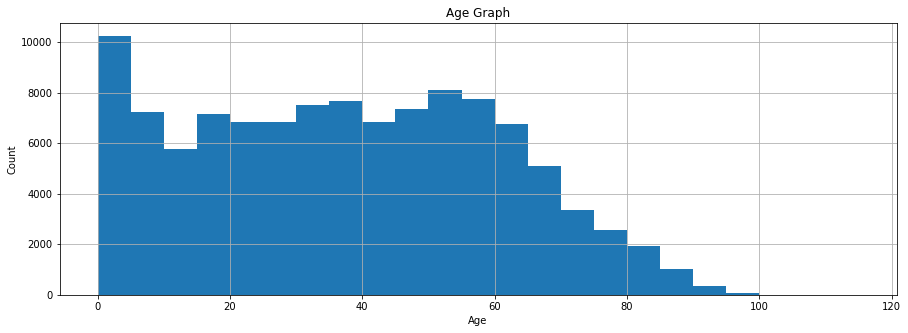

In [22]:
# First I show the Age hisogram for the data 
df.Age.hist(bins=23,figsize=(15,5)) 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.title("Age Graph")

1. Most patients with 20-60 years old


Text(0.5,1,'Showing up Graph')

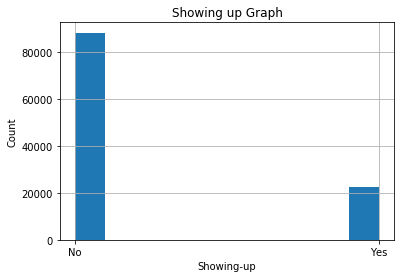

In [23]:
#histogram for show up appionments
df.No_show.hist() 
plt.xlabel("Showing-up") 
plt.ylabel("Count") 
plt.title("Showing up Graph")


Most patients are coming on the appoinments

In [24]:
#To make the Relationship between the age and Showing on appoinments 
# First Wen need to make the No_show appointments columns better to read 
Absent = df['No_show'] == 'Yes'
Show = df['No_show'] == 'No'

In [83]:
#Make a Histogram function to make it easy to use
def histplot (column,title,Xlabel):
    df[Show][column].hist(label='showed')
    df[Absent][column].hist(label='Absent')
    plt.legend();
    plt.title(title)
    plt.xlabel(Xlabel)
    plt.ylabel('count')

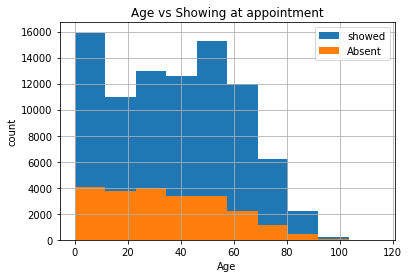

In [84]:
#Second We plot the Age and No_show in to same graph 
histplot ('Age','Age vs Showing at appointment','Age')

As show above we don't see a clear relationship between the age and attending on the appointments.

### Q2. What is the Gender between the age and show-up appointments?

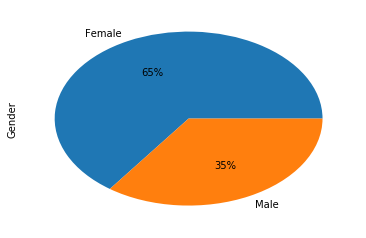

In [93]:
#In General,we are looking on the gender data 

df['Gender'].value_counts().plot(kind="pie",labels=["Female","Male"],autopct='%1.0f%%')



Most of patients from a female, still now this indicator does not mean any thigs

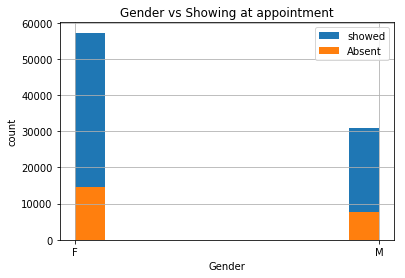

In [85]:
#Plot the Gender and No_show appointments in to same graph 
histplot ('Gender','Gender vs Showing at appointment','Gender')

We look that the female number is twice than male, so the percentage of Committing on appoinments approximatly equel. 

### What is the relationship between the scholership and show-up appointments?

In [95]:
#Look to the number of patients who have a scholarship 
num_of_patients = df.pivot_table(index = ['Scholarship'], aggfunc ='size')
print(num_of_patients)


Scholarship
0    99665
1    10861
dtype: int64


We are noted that the paietns who has a scholarship is nine times of the patients who has not.

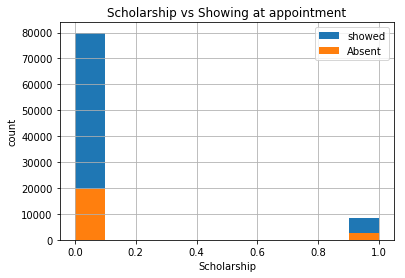

In [86]:
#plot the scholarship with the no show-appointments
histplot ('Scholarship','Scholarship vs Showing at appointment','Scholarship')

Eight times of patients whose are comming on the appointments day have a scholership. This point tell us about the importance of having a health insurance card

### Is any relationship between the patients who has the diseases(Hypertension,Diabetes,Alcoholism and Handcap) and coming on the appointmesnts)?

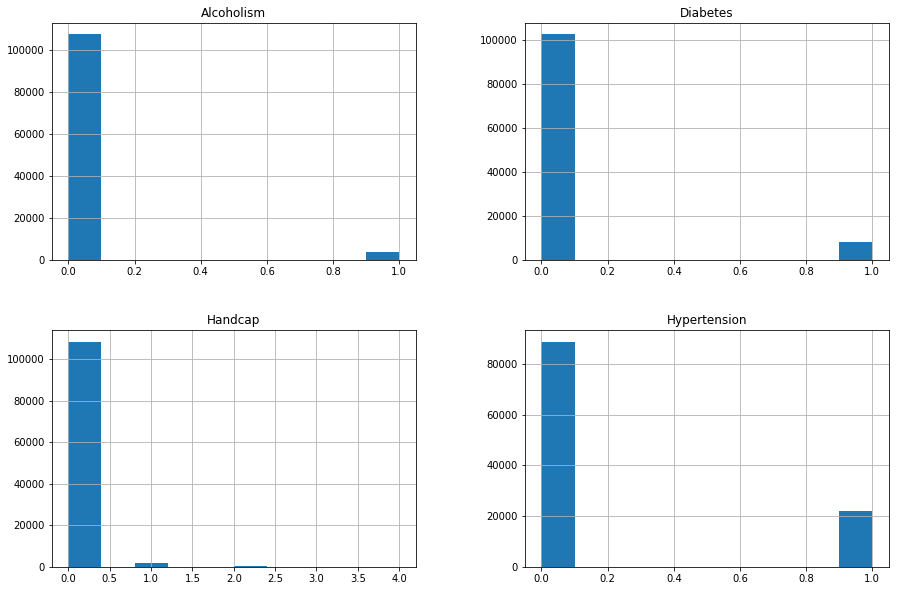

In [97]:
#Quick looking on diseases histogram
diseases_histogram = df.hist(['Hypertension','Diabetes','Alcoholism' , 'Handcap'], figsize=(15,10))

Most of patients have not a diseases

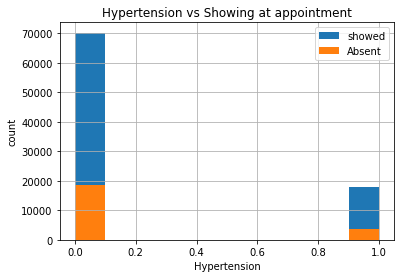

In [87]:
#Plot the relationship between the Hypertension and showing on appointments
histplot ('Hypertension','Hypertension vs Showing at appointment','Hypertension')

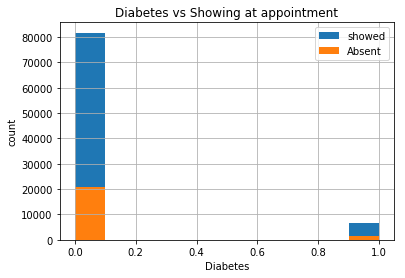

In [88]:
#Plot the relationship between the Diabetes and showing on appointments
histplot ('Diabetes','Diabetes vs Showing at appointment','Diabetes')

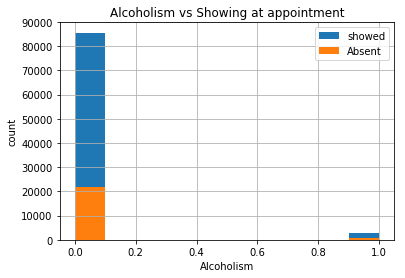

In [89]:
#Plot the relationship between the Alcoholism and showing on appointments
histplot ('Alcoholism','Alcoholism vs Showing at appointment','Alcoholism')

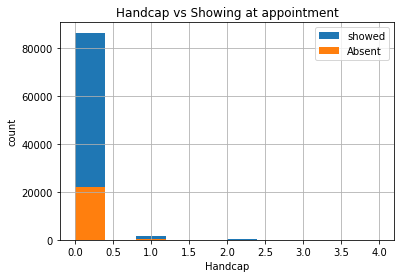

In [90]:
#Plot the relationship between the Handcap and showing on appointments
histplot ('Handcap','Handcap vs Showing at appointment','Handcap')

No clear relationship between the diseases criterion and showing on appointments.

### Is any relationship between the patients who recieving a sms messages and coming on the appointmesnts?

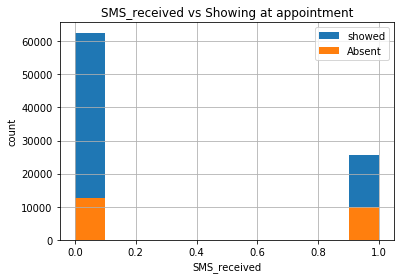

In [91]:
# Show the relationship between the patients who recieving a sms messages and coming on the appointmesnts
histplot ('SMS_received','SMS_received vs Showing at appointment','SMS_received')

40% from patients just received an sms message

<a id='conclusions'></a>
## Conclusions

When we are lookinh to this data, we knew that this data has a limitation in diffrents directions, we need more information to make this analyze better.
The population of Brazil is about 211 million, and the number of dataset is 110,226. These data in relation to the population are not enough to give an overview. The name of the neighborhood does not give enough information because it must be related to the place of patients.ِ Also, the Health insurance should be more explained in terms of categories and its relationship to the age group.

Some looking points about this data set: 
1. Most patients did not receive a confirmation messages about the appointment, so they missed thier appointments
2. The majority of patients do not have NC-diseases, but they stick to the appointment
3. Most patients who do not have health insurance do not show up on time. if the insured people increased the commitment increased

## Refrences
[1]https://datatofish.com/plot-histogram-python/
[2]https://www.geeksforgeeks.org/how-to-count-duplicates-in-pandas-dataframe/
[3]https://www.youtube.com/watch?v=j3jQe19hzUY
[4]https://www.kaggle.com/dev365/investigate-no-show-appointments-dataset
[5][https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699]

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0